<center><H1>Pandas</H1><img src='https://miro.medium.com/max/910/1*yCa5M8MBjdilx9chG2a8Zw.jpeg'/></center>

# Pandas

In [1]:
# установка pandas и seaborn, plotly
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn 
# !pip install plotly
# !pip install plotly_express
# импорт
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## Основная структура данных


![dataframe](https://www.w3resource.com/w3r_images/pandas-data-structure.svg)

При этом есть индексы-порядковые-номера и индексы-названия.  
В примере ниже индексы-номера строк совпадают с обычными индексами, но всё еще это не одно и то же (мы можем перемешать строки, тогда индексы-названия тоже перемешаются, но индексы-номера какими были, такими останутся, потому что это просто порядковые номера).  
То же равносильно для перемешанных для колонок.  
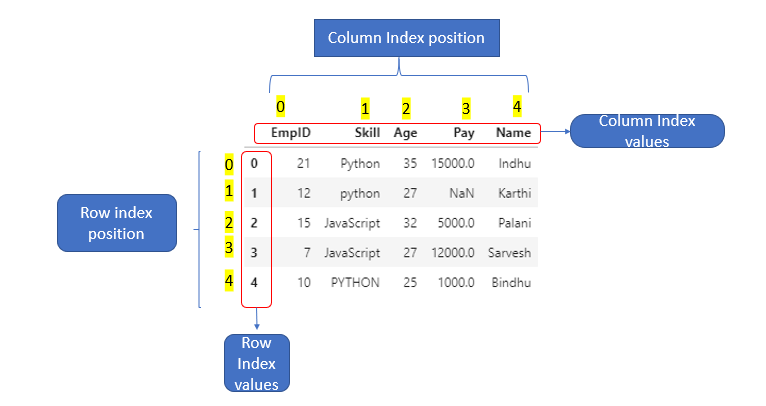

Пример датафрейма с индексами, отличными от порядковых.  
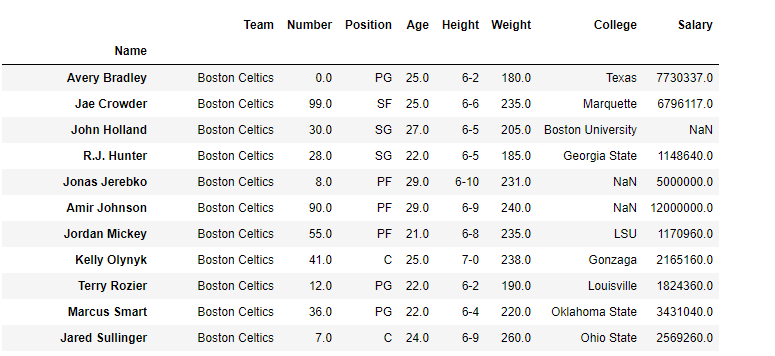

# Потренируемся на классическом датасете -- на титанике

## чтение

In [3]:
# чтение данных
import seaborn as sns # библиотека для визуализации. нужна здесь для загрузки данных

df = sns.load_dataset('titanic') # загрузка с помощью seaborn

# выведем датафрейм
print(df)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [4]:
# теперь выведем красиво
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
# а еще лучше вывести только начальные и/или только конечные строки

df.head(3) 

# df.head(3) # можно передать целое число в качестве аргументе -- число строк

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [5]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


## Описательные функции

### Встроенные удобные методы

In [6]:
# информация о столбцах, типе данных, наличии пропусков

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
# основные базовые статистики

df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# атрибут с колонками
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [9]:
# атрибут с индексами (названиями строк)
df.index

RangeIndex(start=0, stop=891, step=1)

In [10]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

## Обращение к строкам и столбцам

In [11]:
# к столбцу можно обратить просто по названию
df['pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: int64

In [12]:
# также это можно сделать через точку, как мы обращаемся к атрибуту
# но это работает только если название колонки не является зарезервированным методом и состоит из 1 слова (т.е. если нет пробелов)

df.pclass

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: int64

In [13]:
# для обращения к нескольким столбцам нужно указать список с названиями
df[['who', 'pclass', 'alive']] # колонки будут идти в том порядке, в котором скажем

,who,pclass,alive
0,man,3,no
1,woman,1,yes
2,woman,3,yes
3,woman,1,yes
4,man,3,no
...,...,...,...
886,man,2,no
887,woman,1,yes
888,woman,3,no
889,man,1,yes


In [14]:
# или так
cols = ['pclass', 'who','alive']
df[cols]

,pclass,who,alive
0,3,man,no
1,1,woman,yes
2,3,woman,yes
3,1,woman,yes
4,3,man,no
...,...,...,...
886,2,man,no
887,1,woman,yes
888,3,woman,no
889,1,man,yes


In [15]:
# обратить к строкам сложнее, нужно использовать метод loc
# как обращение внутри матрицы. Сначала строки, потом колонки. Через запятую 

df.loc[1:10, ]  # можно поставить двуеточие после запятой, можно не ставить. разницы не будет.

# беру строки с индексами-названиями от 1 до 10. Включая концы. 



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False


In [16]:
# отберем еще срез по колонкам

df.loc[1:10, 'sex':'class']

,sex,age,sibsp,parch,fare,embarked,class
1,female,38.0,1,0,71.2833,C,First
2,female,26.0,0,0,7.9250,S,Third
3,female,35.0,1,0,53.1000,S,First
4,male,35.0,0,0,8.0500,S,Third
5,male,NaN,0,0,8.4583,Q,Third
6,male,54.0,0,0,51.8625,S,First
7,male,2.0,3,1,21.0750,S,Third
8,female,27.0,0,2,11.1333,S,Third
9,female,14.0,1,0,30.0708,C,Second
10,female,4.0,1,1,16.7000,S,Third


In [17]:
# еще раз поймем, что мы орбатились к строкам не по порядковому индексу, а по индексу-названию
# возьмем датафрейм в перемешанном порядке

df_random = df.sample(frac=1)
df_random.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
385,0,2,male,18.0,0,0,73.5000,S,Second,man,True,NaN,Southampton,no,True
191,0,2,male,19.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
178,0,2,male,30.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
548,0,3,male,33.0,1,1,20.5250,S,Third,man,True,NaN,Southampton,no,False
482,0,3,male,50.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
583,0,1,male,36.0,0,0,40.1250,C,First,man,True,A,Cherbourg,no,True
681,1,1,male,27.0,0,0,76.7292,C,First,man,True,D,Cherbourg,yes,True
771,0,3,male,48.0,0,0,7.8542,S,Third,man,True,NaN,Southampton,no,True
520,1,1,female,30.0,0,0,93.5000,S,First,woman,False,B,Southampton,yes,True
553,1,3,male,22.0,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,yes,True


In [18]:
# и теперь отберем "первые" 10 строк и нужные столбцы

df_random.loc[1:10, 'sex':'class']

# мы видим, что нам были выданы строки, находящиеся от строки с "названием" 1 до строки с "названием" 10, а не первые 10 строк по порядку.

,sex,age,sibsp,parch,fare,embarked,class


In [19]:
# для обращения по порядковым номерам используется метод pd.DataFrame.iloc() 

df_random.iloc[0:10, ] # первые десять строк

# можно поставить двуеточие после запятой, можно не ставить. разницы нет

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
385,0,2,male,18.0,0,0,73.5000,S,Second,man,True,NaN,Southampton,no,True
191,0,2,male,19.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
178,0,2,male,30.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
548,0,3,male,33.0,1,1,20.5250,S,Third,man,True,NaN,Southampton,no,False
482,0,3,male,50.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
583,0,1,male,36.0,0,0,40.1250,C,First,man,True,A,Cherbourg,no,True
681,1,1,male,27.0,0,0,76.7292,C,First,man,True,D,Cherbourg,yes,True
771,0,3,male,48.0,0,0,7.8542,S,Third,man,True,NaN,Southampton,no,True
520,1,1,female,30.0,0,0,93.5000,S,First,woman,False,B,Southampton,yes,True
553,1,3,male,22.0,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,yes,True


In [20]:
df_random.head(10) # вывод первых 10 строк через head

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
385,0,2,male,18.0,0,0,73.5000,S,Second,man,True,NaN,Southampton,no,True
191,0,2,male,19.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
178,0,2,male,30.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
548,0,3,male,33.0,1,1,20.5250,S,Third,man,True,NaN,Southampton,no,False
482,0,3,male,50.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
583,0,1,male,36.0,0,0,40.1250,C,First,man,True,A,Cherbourg,no,True
681,1,1,male,27.0,0,0,76.7292,C,First,man,True,D,Cherbourg,yes,True
771,0,3,male,48.0,0,0,7.8542,S,Third,man,True,NaN,Southampton,no,True
520,1,1,female,30.0,0,0,93.5000,S,First,woman,False,B,Southampton,yes,True
553,1,3,male,22.0,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,yes,True


In [21]:
# проверим, где они не совпадают
bool_df = df_random.head(10) != df_random.iloc[0:10, ] # понятно, что везде совпадают. Но проверим!
bool_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
385,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
191,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
178,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
548,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
482,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
583,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
681,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
771,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
520,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
553,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [22]:
# посчитаем, сколько было НЕСОВПАДЕНИЙ
bool_col = bool_df.sum()
bool_col

# ВОПРОС
# откуда семерка?

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           7
embark_town    0
alive          0
alone          0
dtype: int64

In [23]:
# получили столбец (pd.Series) с суммой для каждого столбца
# посчитаем сумму для полученного столбца
bool_col.sum() # добавили ещё sum

# ВОПРОС
# откуда семерка? 

7

In [24]:
# еще пример обращения по порядковым номерам

df_random.iloc[123:132, 2:5]

,sex,age,sibsp
465,male,38.00,0
521,male,22.00,0
677,female,18.00,0
49,female,18.00,1
124,male,54.00,0
387,female,36.00,0
78,male,0.83,0
299,female,50.00,0
294,male,24.00,0


In [25]:
#################
###  ЗАДАНИЕ  ###
#################
# Выведите строки от 500 до 525 (порядковый номер) для столбцов survived, sex
# сначала отберите два столбца, а затем уже отберите строки по номерам с помощью iloc()

# ваш код




In [26]:
df.loc[500:525, 'survived':'sex'] # НЕВЕРНО

,survived,pclass,sex
500,0,3,male
501,0,3,female
502,0,3,female
503,0,3,female
504,1,1,female
505,0,1,male
506,1,2,female
507,1,1,male
508,0,3,male
509,1,3,male


In [27]:
df.loc[:, 'survived':'sex'].iloc[500:525, ]

,survived,pclass,sex
500,0,3,male
501,0,3,female
502,0,3,female
503,0,3,female
504,1,1,female
505,0,1,male
506,1,2,female
507,1,1,male
508,0,3,male
509,1,3,male


In [28]:
#################
###  ЗАДАНИЕ  ###
#################
# Выведите первые 25 строк для столбцов survived, sex

# ваш код




In [29]:
#################
###  ЗАДАНИЕ  ###
#################
# Выведите последние 10 строк для столбцов survived, sex

# ваш код




## Работа с `pd.Series`

### Агрегирующие функции
Агрегирующие -- переводящие нас в пространство меньшей размерности, i.e. было 100 строк, стала 1.

In [30]:
# возьмем для примера столбец с возрастом
df['age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [31]:
df.mean() # для всех числовых колонок

C:\Users\igumn\AppData\Local\Temp\ipykernel_7428\833669634.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean() # для всех числовых колонок


survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

In [32]:
# среднее
df['age'].mean()

29.69911764705882

In [33]:
# дисперсия
df['age'].var()

211.01912474630802

In [34]:
# стандартное отклонение
df['age'].std()

14.526497332334042

In [35]:
# медиана
df['age'].median()

28.0

In [36]:
# квантили
df['age'].quantile([0.25, 0.5, 0.75])

0.25    20.125
0.50    28.000
0.75    38.000
Name: age, dtype: float64

### Пара полезных функций

In [37]:
# получить уникальные значения
df['pclass'].unique()

array([3, 1, 2], dtype=int64)

In [38]:
# получить число уникальных значений
df['pclass'].nunique()

3

In [39]:
# посчиать число вхождений каждого уникального элемента
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [40]:
# отсоритруем по убыванию по значению
df['pclass'].value_counts().sort_values(ascending=False)

3    491
1    216
2    184
Name: pclass, dtype: int64

In [41]:
# а теперь по индексам
df['pclass'].value_counts().sort_index()

1    216
2    184
3    491
Name: pclass, dtype: int64

In [42]:
#################
###  ЗАДАНИЕ  ###
#################
# Посчитайте число людей из датасета, выживших и погибших в результате кораблекрушения. 
# Определите колонку, где сохранена эта информация, и воспользуйтесь методом value_counts

# ваш код

df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [43]:
df['alive'].value_counts()

no     549
yes    342
Name: alive, dtype: int64

In [44]:
#################
###  ЗАДАНИЕ  ###
#################
# Посчитайте число мужчин и женщин (колонка sex)
# 

# ваш код



In [45]:
#################
###  ЗАДАНИЕ  ###
#################
# Посчитайте, сколько людей путешествовали в  каюте каждого класса.
# 

# ваш код



In [46]:
#################
###  ЗАДАНИЕ  ###
#################
# Разобьем на 4 возрастные группы (до 18, от 18 до 25, от 25 до 40, больше 40) 
# и посчитаем, сколько людей попало в каждую группу

# ваш код

# 
# https://pandas.pydata.org/docs/reference/api/pandas.cut.html
#


In [47]:
pd.cut(df.age, [df.age.min(), 18, 25, 40, df.age.max()], right=False).value_counts().sort_index()

[0.42, 18.0)    113
[18.0, 25.0)    165
[25.0, 40.0)    273
[40.0, 80.0)    162
Name: age, dtype: int64

In [48]:
# или запишем так
(
    pd.cut(df.age, 
           [df.age.min(), 18, 25, 40, df.age.max()], 
           right=False)
    .value_counts()
    .sort_index()
)

[0.42, 18.0)    113
[18.0, 25.0)    165
[25.0, 40.0)    273
[40.0, 80.0)    162
Name: age, dtype: int64

In [49]:
# или так
pd.cut(df.age, [df.age.min(), 18, 25, 40, df.age.max()], right=False)\
    .value_counts()\
    .sort_index()

[0.42, 18.0)    113
[18.0, 25.0)    165
[25.0, 40.0)    273
[40.0, 80.0)    162
Name: age, dtype: int64

## Немного визуализации
Удочка на потом

<Axes: >

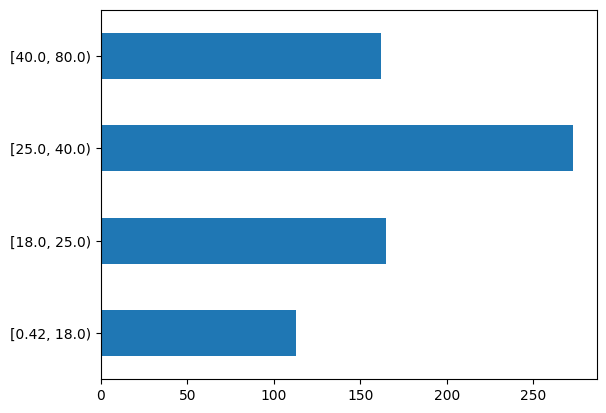

In [50]:
(
    pd.cut(df.age, 
           [df.age.min(), 18, 25, 40, df.age.max()], 
           right=False)
    .value_counts()
    .sort_index()
    .plot
    .barh() # barh == bar horizontal
)

<center>
<img src='https://api.www.labxchange.org/api/v1/xblocks/lb:LabXchange:d8863c77:html:1/storage/211626365402575-b88c4d0fdacd5abb4c3dc2de3bc004bb.png'/>
</center>

<Axes: >

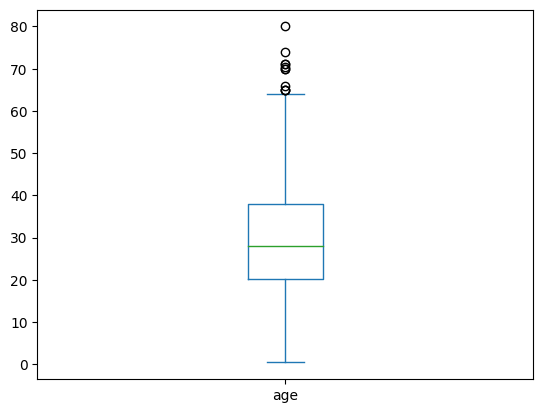

In [51]:
# визуализируем с помощью boxplot столбец с возрастом
df['age'].plot.box()

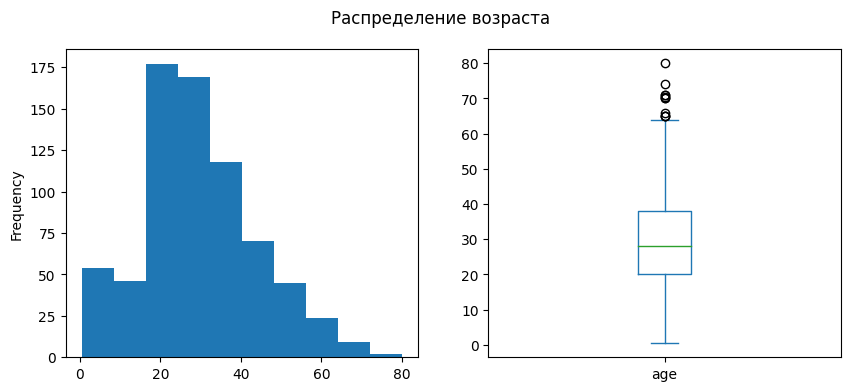

In [52]:
# визуализируем с помощью гистограммы частот столбец с возрастом

plt.figure(figsize=(10, 4)) # укажем ширину и высоту

plt.subplot(1, 2, 1) # первая ячейка
df['age'].plot.hist() # ГЛАВНОЕ, СМОТРИТЕ ЛУЧШЕ ТОЛЬКО СЮДА

plt.subplot(1, 2, 2) # вторая ячейка
df['age'].plot.box() # ГЛАВНОЕ, СМОТРИТЕ ЛУЧШЕ ТОЛЬКО СЮДА

plt.suptitle('Распределение возраста') # название всего графика
plt.show()

In [56]:
# ps
# нарисовать их как subplots невозможно из под pandas, для этого нужно делать визуализацию напрямую через plotly

age    Axes(0.125,0.11;0.775x0.77)
dtype: object

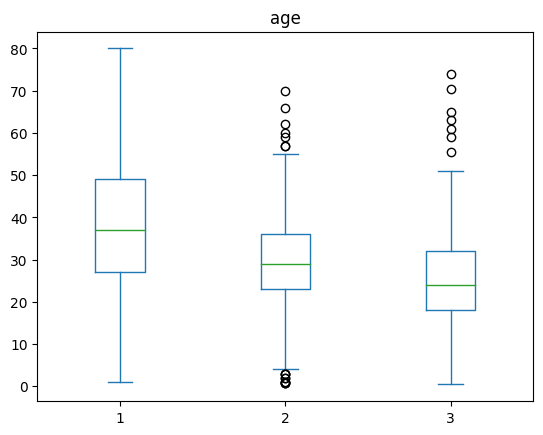

In [57]:
# документация по визуализации https://pandas.pydata.org/docs/user_guide/visualization.html
# в документации инструкции только для matplotlib
# информация о работе с помощью plotly на сайте plotly

pd.options.plotting.backend = "matplotlib" # вернем исходный движок 
df.plot.box(column='age', by='pclass') # нарисуем боксплоты возрастов для трёх категорий билетов

## Фильтрация строк

### Вспоминаем булевые маски

In [58]:
import numpy as np
# создадим веткор из 100 случайных целых чисел от 1 до 100
nums = np.random.randint(low=1, high=100, size=100)
nums

array([21, 43, 67, 66, 29, 36, 68, 55,  9, 63, 31, 59, 32, 36, 14, 14, 77,
       19, 62, 72, 40, 96, 37, 53, 84,  6, 90,  9, 43,  7, 40,  4, 88, 28,
       74, 13, 97, 67, 47, 46,  6, 62, 39, 22,  3, 19, 45, 63, 36, 74, 32,
       57, 14, 26, 74, 20, 90, 17, 58, 21, 50, 59, 62, 51, 58, 87, 46, 71,
       96, 44, 83, 78, 10, 75,  4, 86, 78,  7, 78, 88, 34, 19, 50, 83, 77,
       33, 42,  1, 88, 44, 12, 46, 40,  6, 27, 58, 84, 21, 33, 75])

In [59]:
# логическое выражене
nums > 50

array([False, False,  True,  True, False, False,  True,  True, False,
        True, False,  True, False, False, False, False,  True, False,
        True,  True, False,  True, False,  True,  True, False,  True,
       False, False, False, False, False,  True, False,  True, False,
        True,  True, False, False, False,  True, False, False, False,
       False, False,  True, False,  True, False,  True, False, False,
        True, False,  True, False,  True, False, False,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True, False,  True,  True, False,  True,  True, False,
       False, False,  True,  True, False, False, False,  True, False,
       False, False, False, False, False,  True,  True, False, False,
        True])

In [60]:
# сколько чисел получилось больше 50
(nums > 50).sum()

44

In [61]:
# или
res = nums > 50
res.sum()

44

In [62]:
# а теперь отберем из веткора эти числа
nums[nums > 50] # оставить nums такие, что nums > 50

array([67, 66, 68, 55, 63, 59, 77, 62, 72, 96, 53, 84, 90, 88, 74, 97, 67,
       62, 63, 74, 57, 74, 90, 58, 59, 62, 51, 58, 87, 71, 96, 83, 78, 75,
       86, 78, 78, 88, 83, 77, 88, 58, 84, 75])

In [63]:
# и для них посчитаем, например, среднее
print(nums[nums > 50].mean())

# или
greater_50 = nums[nums > 50]
print(greater_50.mean())

73.43181818181819
73.43181818181819


### Так же и в pandas

In [64]:
# логическое выражение
df['age'] > 18

0       True
1       True
2       True
3       True
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: age, Length: 891, dtype: bool

In [65]:
# оставить такие строки, где df['age'] > 18
df[df['age'] > 18]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [66]:
mask = df['pclass'] == 1
df[mask]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [67]:
#################
###  ЗАДАНИЕ  ###
#################
# Отфильтруйте строки с информацией про женщин
# (для проверки равенства используется знак "==")
# ваш код

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [68]:
#################
###  ЗАДАНИЕ  ###
#################
# Отфильтруйте строки с информацией про женщин, которые путешествовали первым классом
# (для проверки равенства используется знак "==")
# булевые маски нужно обрамлять круглыми скобками
# ваш код



In [69]:
#################
###  ЗАДАНИЕ  ###
#################
# Отфильтруйте строки с информацией про мужчин, которые выжили. Посчитайте, сколько из них каким классом путешествовали.
# (для проверки равенства используется знак "==")
# булевые маски нужно обрамлять круглыми скобками
# ваш код



### Создание новых столбцов

In [70]:
# создадим столбец adult с бинаркной меткой, относится ли запись к взрослому или нет (старше человек 18 или нет)

# булевой веткор
mask = list((df['age'] >= 18).values)
print(len(mask))

891


In [71]:
# создадим столбец
df['adult'] = mask # буквально, как создать пару в словаре
df.head() # появился столбец

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True


In [72]:
df['age_times_two'] = df['age'] * 2
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult,age_times_two
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True,44.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True,76.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True,52.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True,70.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True,70.0


In [73]:
# и теперь отфильтровать только совершеннолетних легче 
df[df['adult']] # не пишем выражение, а просто даем внутрь в качестве булевой маски столбец. он же содержит True и False :)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult,age_times_two
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True,44.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True,76.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True,52.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True,70.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,True,78.0
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,True,54.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,True,38.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,True,52.0


### Несколько выражений

In [74]:
# отфильтруем строки для женщин из певрого класса
df[(df['sex'] == 'female') & (df['pclass'] == 1)] # каждое выражение в скобках. знак И -- амперсанд "&". Знак ИЛИ -- пайп "|".

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult,age_times_two
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True,76.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True,70.0
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,True,116.0
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False,False,NaN
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False,True,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False,True,90.0
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True,True,96.0
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False,True,94.0
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False,True,112.0


In [75]:
#################
###  ЗАДАНИЕ  ###
#################
# Среди женщин, которые плыли первым классом, посчитайте, сколько выжило, сколько нет
# переведите результат в проценты (найдите соотв. параметр у функции для подсчета встречаемости категорий)
# ваш код


In [76]:
#################
###  ЗАДАНИЕ  ###
#################
# проделайте аналогичную операцию для мужчин, плывших первым классом

# ваш код


## Итерация

In [77]:
# можно перебрать датафрейм. есть несколько вариантов
df_small = df.sample(n=5) # отберем случайные 5 строк
df_small

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult,age_times_two
121,0,3,male,NaN,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True,False,NaN
463,0,2,male,48.0,0,0,13.000,S,Second,man,True,NaN,Southampton,no,True,True,96.0
761,0,3,male,41.0,0,0,7.125,S,Third,man,True,NaN,Southampton,no,True,True,82.0
379,0,3,male,19.0,0,0,7.775,S,Third,man,True,NaN,Southampton,no,True,True,38.0
344,0,2,male,36.0,0,0,13.000,S,Second,man,True,NaN,Southampton,no,True,True,72.0


In [78]:
df_small.iterrows() # возвращается генератор, т.е. итерируемый объект. его можно перебрать циклом

<generator object DataFrame.iterrows at 0x000001F6C8783F90>

In [79]:
for row in df_small.iterrows():
    print(row) # возвращается кортеж из индекса-имени строки и pandas.Series
    print() # пропуск строки
    
    print('index\n', row[0])
    print() # пропуск строки
    
    print('Series\n', row[1])
    print()
    
    print('Значение из series\n', row[1]['embark_town'])
    break # чтобы прервать цикл сразу же

(121, survived                   0
pclass                     3
sex                     male
age                      NaN
sibsp                      0
parch                      0
fare                    8.05
embarked                   S
class                  Third
who                      man
adult_male              True
deck                     NaN
embark_town      Southampton
alive                     no
alone                   True
adult                  False
age_times_two            NaN
Name: 121, dtype: object)

index
 121

Series
 survived                   0
pclass                     3
sex                     male
age                      NaN
sibsp                      0
parch                      0
fare                    8.05
embarked                   S
class                  Third
who                      man
adult_male              True
deck                     NaN
embark_town      Southampton
alive                     no
alone                   True
adult              

In [80]:
# вариант получше
df_small.itertuples()

In [81]:
for row in df_small.itertuples(name='titanic_pasenger'): # можно указать имя кортежа
    print(row) # возвращается кортеж из индекса и всех значения (именнованный кортеж)
    print() # пропуск строки
    
    print('index\n', row[0])
    print() # пропуск строки
    
    print('первый элемент строки\n', row[1])
    print('второй элемент строки\n', row[2])
    print('атрибут "who"\n', row.who)
    
    break # чтобы прервать цикл сразу же

titanic_pasenger(Index=121, survived=0, pclass=3, sex='male', age=nan, sibsp=0, parch=0, fare=8.05, embarked='S', _9='Third', who='man', adult_male=True, deck=nan, embark_town='Southampton', alive='no', alone=True, adult=False, age_times_two=nan)

index
 121

первый элемент строки
 0
второй элемент строки
 3
атрибут "who"
 man


In [82]:
# вообще, если вы итерируете, а не применяете векторную форму, то стоит задуматься, а всё ли вы делаете так?

## Сохранение результатов

In [83]:
# общий метод to_X, где X -- тип файла. например to_csv или to_excel 
# для использования to_excel нужно установить библиотеку "openpyxl" через pip

# допустим, мы снимаем документальный фильм про титаник. Хотим найти очевидцев. 
# Тогда нам нужно отфильтровать из датасета детей, которые выжили,
# и сохранить файл, чтоб отправить его далее коллегам

df[(df['who'] == 'child') & (df['alive'] == 'yes')].head() # убедимся, что всё ок

# я укзаал просто столбец survived, потому что он бинарный. 1 -- True, 0 -- False. 
# Так что он уже как бы содержит True/False, нужные для фильтрации

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult,age_times_two
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,False,28.0
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,False,8.0
22,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True,False,30.0
39,1,3,female,14.0,1,0,11.2417,C,Third,child,False,NaN,Cherbourg,yes,False,False,28.0
43,1,2,female,3.0,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False,False,6.0


In [84]:
# укажем название конечного файла, разделитель, кодировку
df[(df['who'] == 'child') & (df['survived'])].to_csv('titanic_kids.csv', sep='\t', encoding='utf-8')

# Практика

In [85]:
# возьмем датасет из seaborn
# описание https://data.world/dataman-udit/cars-data
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [86]:
# посмотрите, сколько строк и столбцов в датафрейме (атрибут shape)


In [87]:
# посмотрие типы данных для каждого столбца, число пропусков, сколько памяти занимает датарфейм (метод info)


In [88]:
# определите уникальные значения для столбца cylinders (метод unique)


In [89]:
# выберите категориальный столбец подходящий для метода value_counts. То есть в столбце не должно быть много категорий
# попробуйте либо cylinders, либо origin. Определите, сколько уникальных значения в каждом из этих двух столбцов. 
# Используйте тот, где уникальных значений меньше


In [90]:
# Отфильтруйте строки автомобилей из европы
#

In [91]:
# Отфильтруйте строки автомобилей из европы, отсортируйте по числу лошадиных сил, сохраните в новый датафрейм
#

In [92]:
# посчитайте, сколько автомобилей в европе имели более 80 лошадиных сил
#

In [93]:
# посчитайте средний вес автомобиля, выпущенного в японии
#

In [94]:
# посчитайте медианное значение displacement для американских автомобилей (origin usa), 
# которые были разработаны (model_year) после 75 года
# 

In [95]:
# ОПЦИОНАЛЬНО
# постройте гистограмму частот для столбца лошадиных сил для всех авмомобилей сразу
# 
# Документация: https://pandas.pydata.org/docs/user_guide/visualization.html
#

In [96]:
# ОПЦИОНАЛЬНО
# постройте гистограмму частот для столбца лошадиных сил 
# для каждого origin на отдельном графике
# (посмотрите параметры by, column) 

plt.show() # чтоб убрать лишние строки из выдачи